# ***Heart Disease Analysis***

---



![heart attack](https://thumbs.gfycat.com/FamiliarUnacceptableJapanesebeetle-size_restricted.gif)

### Dataset Information
1. Age: Patients Age in years (Numeric)
2. Sex: Gender (Male : 1; Female : 0) (Nominal)
3. cp: Type of chest pain experienced by patient. This term categorized into 4 category.
0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)
4. trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)
5. chol: Serum cholesterol in mg/dl (Numeric)
6. fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7. restecg: Result of electrocardiogram while at rest are represented in 3 distinct values
0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >
0.05 mV) 2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
8. thalach: Maximum heart rate achieved (Numeric)
9. exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
11. slope: ST segment measured in terms of slope during peak exercise
0: up sloping; 1: flat; 2: down sloping(Nominal)
12. ca: The number of major vessels (0–3)(nominal)
13. thal: A blood disorder called thalassemia
0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but it is not normal(nominal)
14. target: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.


---


Two factors are crucial in cases of heart disease:
* Heart disease should not be assumed to be normal if it is present. To put it another way, recall becomes a crucial metric.
* The patient should be given a thorough explanation of the diagnosis findings. To put it another way, you should be able to rationally justify to the patient whatever factors contributed to your choice.


# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go




# Loading the DataSet

In [2]:
df = pd.read_csv("Dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


# EDA

### Shape of dataframe

In [3]:
df.shape

(303, 14)

### Info of dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Check missing value

<Axes: >

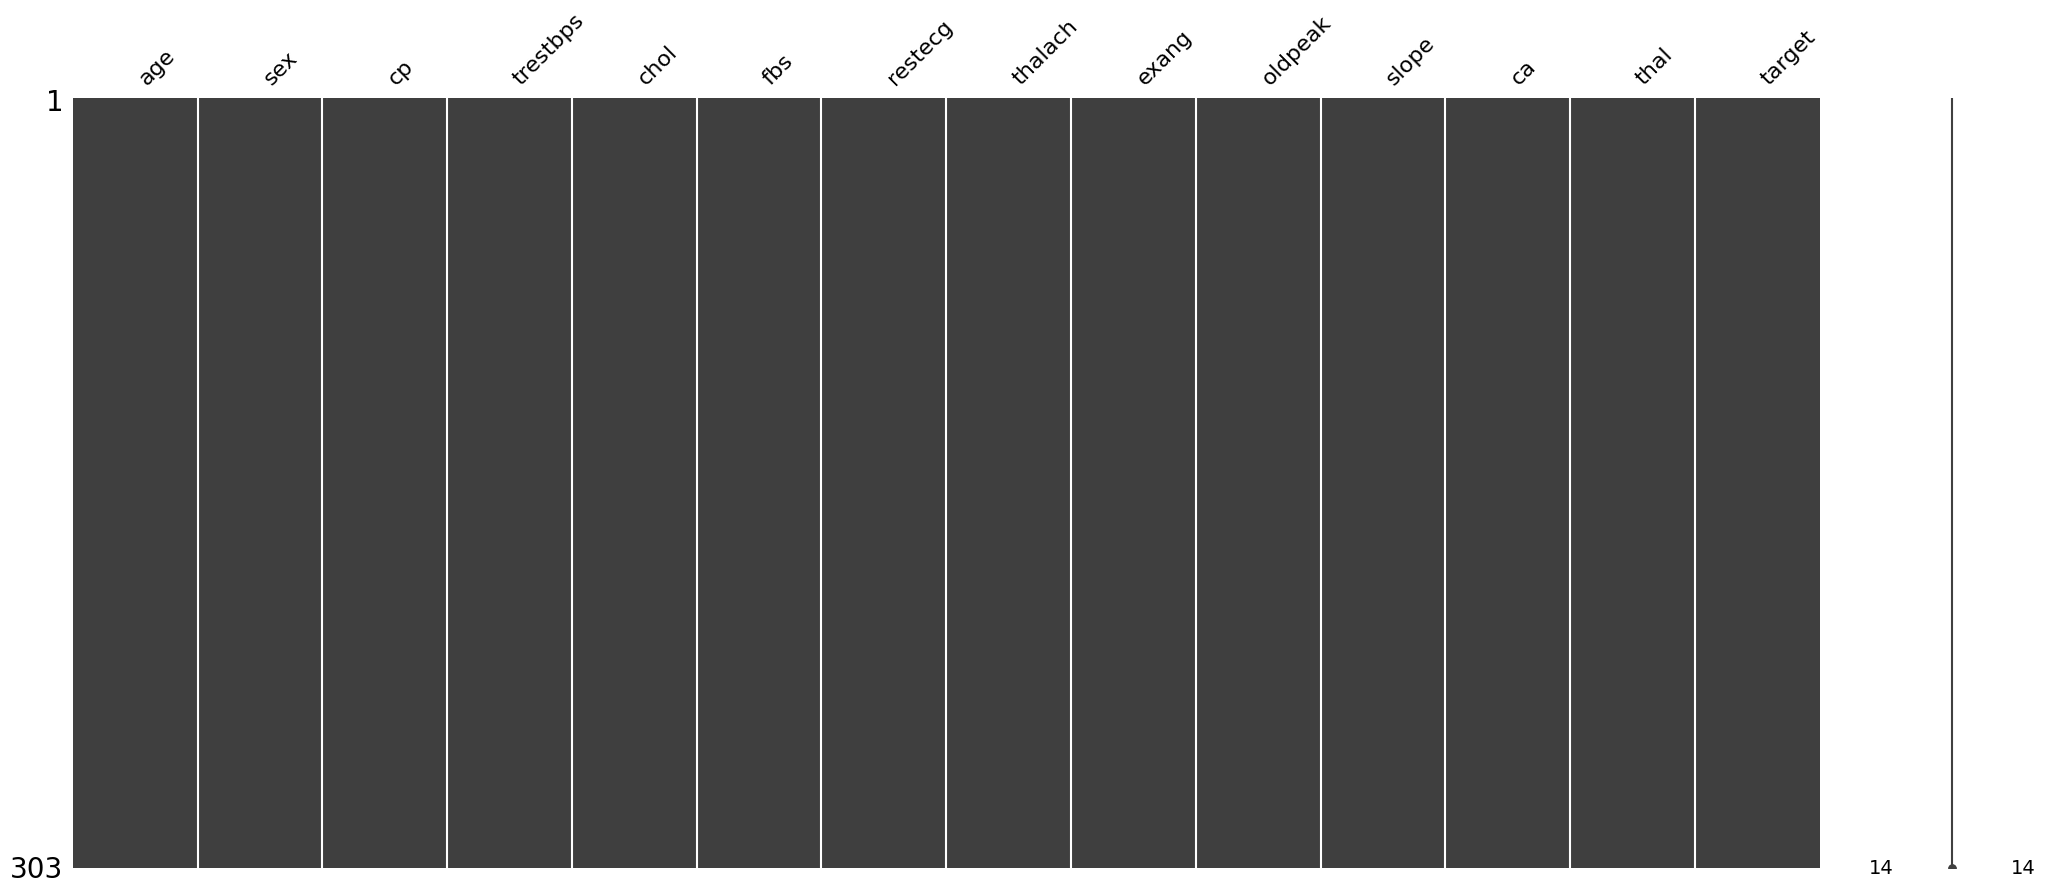

In [5]:
msno.matrix(df)

No presence of missing value

### Datatype of feature

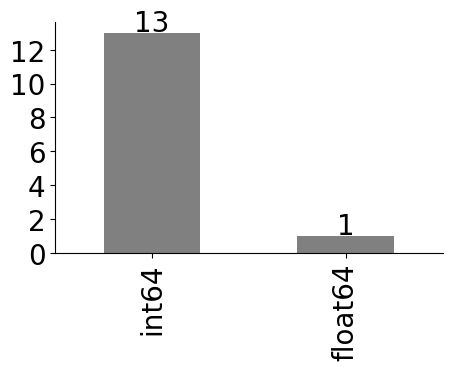

In [6]:
colors = ['gold', 'mediumturquoise']
labels = ['Normal','Heart Disease']
values = df['target'].value_counts()/df['target'].shape[0]

##########################
plt.figure(figsize = (5,3))
ax = df.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20,color='grey')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 0.1, height, ha = 'center', size = 20)
sns.despine()

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


Text(0.5, 1.0, 'Correlation Plot')

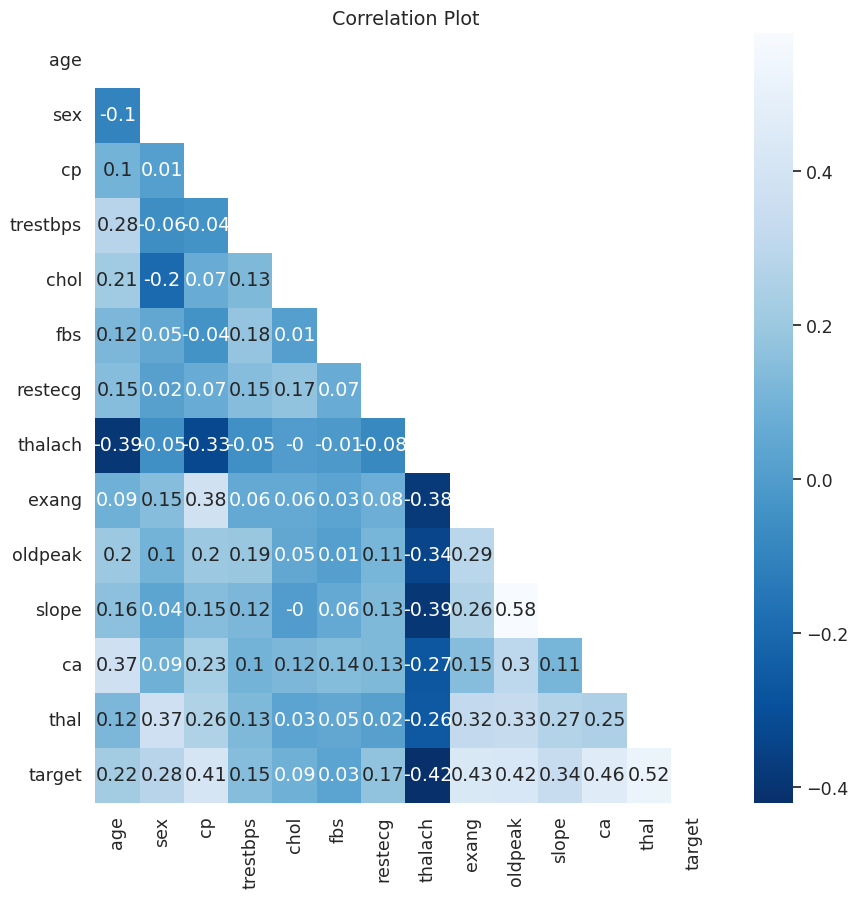

In [8]:

corr=df.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(10, 10))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='Blues_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

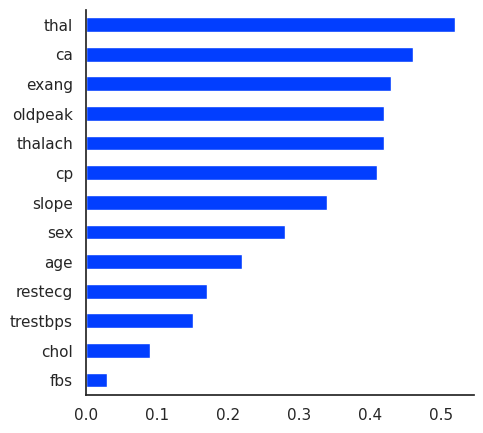

In [9]:
sns.set(font_scale=1)
plt.figure(figsize=(5, 5))
sns.set_style("white")
sns.set_palette("bright")
abs(corr['target']).sort_values()[:-1].plot.barh()
plt.gca().set_facecolor('#FFFFFF')
sns.despine()

## Univariate

### Count Plot of target feature

In [10]:

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Heart Disease",
    title_font_color="black",
    font_color="black",
)
fig.show()

The difference found is not greater than 10%, so I will not try to balance it rather work on the original dataset.

### Countplot of other ordinal features

#### Gender

Text(0.5, 1.0, 'Gender')

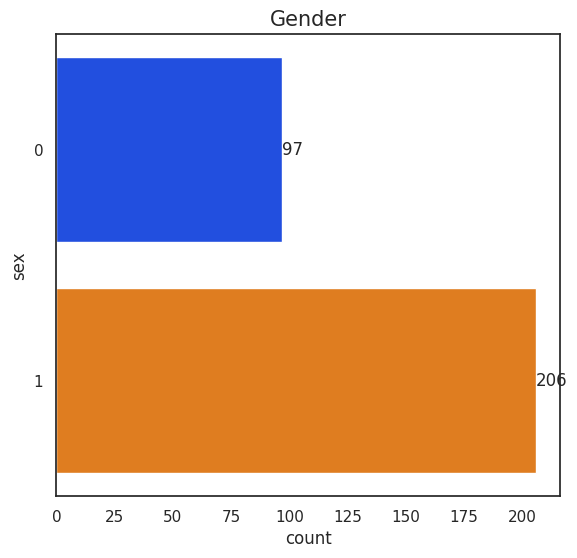

In [11]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.countplot(y = df.sex)
ax1.bar_label(container = ax1.containers[0])
ax1.set_title('Gender',fontsize = 15 )

* 0 --> Female
* 1 --> Male

#### Chest Pain

Text(0.5, 1.0, 'Type of chest pain (cp)')

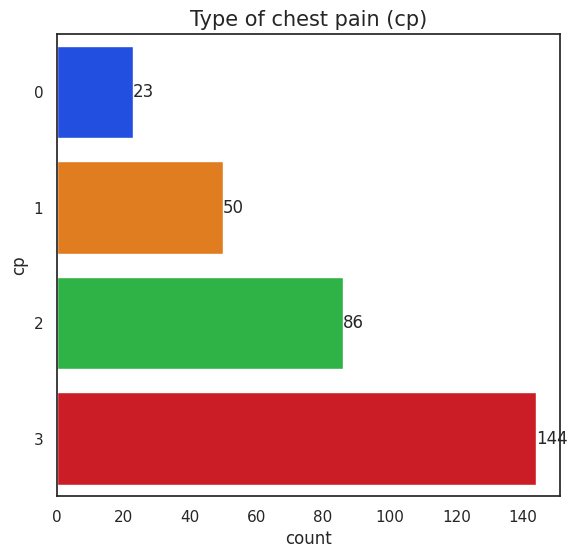

In [12]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.countplot(y = df.cp)
ax1.bar_label(container = ax1.containers[0])
ax1.set_title('Type of chest pain (cp)',fontsize = 15 )

1.  0: typical angina
2.  1: atypical angina
3.  2: non- anginal pain
4.  3: asymptomatic

Maximum number of patients were asymptomatic followed by non- anginal pain.

#### Blood Sugar Level

Text(0.5, 1.0, 'Blood sugar level>120mg/dl')

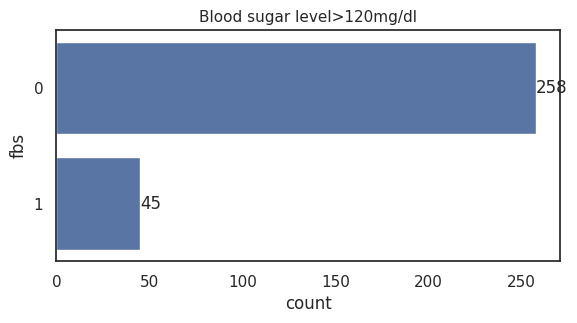

In [13]:
fig1 , ax1 = plt.subplots(figsize= (6.5,3))
ax1 = sns.countplot(y = df.fbs, color = 'b')
ax1.bar_label(container = ax1.containers[0])
ax1.set_title('Blood sugar level>120mg/dl',fontsize = 11 )

This suggests that the dataset may be imbalanced, with the majority of instances belonging to the 0 class i.e patients having Blood Sugar level greater than 120mg/dl and a small minority belonging to the 1 class

#### Electrocardiogram

Text(0.5, 1.0, 'Result of electrocardiogram')

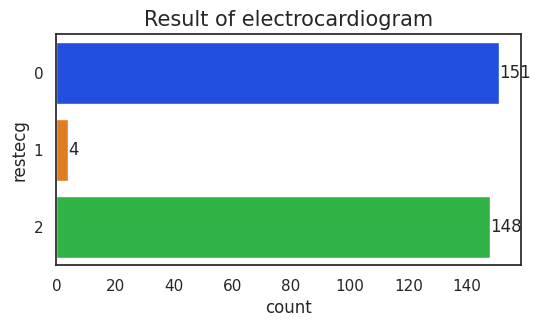

In [14]:
fig1 , ax1 = plt.subplots(figsize= (6,3))
ax1 = sns.countplot(y = df.restecg)
ax1.bar_label(container = ax1.containers[0])
ax1.set_title('Result of electrocardiogram',fontsize = 15 )

 

* 0 : Normal
* 1: having ST-T wave abnormality (T wave inversions     and/or ST elevation or depression of >0.05 mV)
* 2: showing probable or definite left ventricular hypertrophyby  


#### Angina

Text(0.5, 1.0, 'Angina induced by exercise')

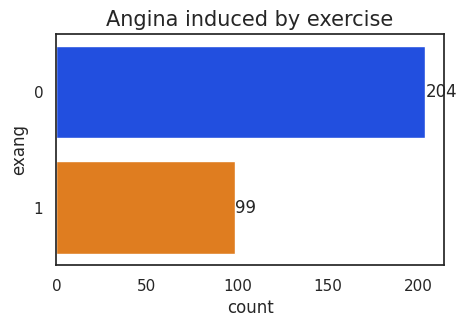

In [15]:
fig1 , ax1 = plt.subplots(figsize= (5,3))
ax1 = sns.countplot(y = df.exang)
ax1.bar_label(container = ax1.containers[0])
ax1.set_title('Angina induced by exercise',fontsize = 15 )

* 0 --> NO
* 1 --> YES

people with no exercise are more prone to heart disease


#### slope

Text(0.5, 1.0, 'slope during peak exercise')

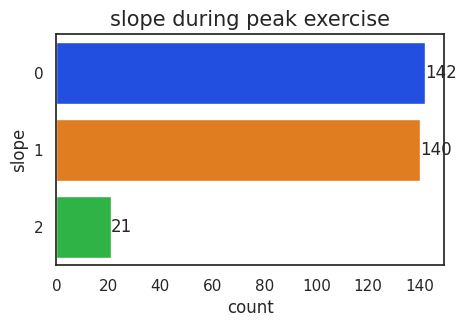

In [16]:
fig1 , ax1 = plt.subplots(figsize= (5,3))
ax1 = sns.countplot(y = df.slope)
ax1.bar_label(container = ax1.containers[0])
ax1.set_title('slope during peak exercise',fontsize = 15 )




* 0: up sloping
* 1: flat
* 2: down sloping


Text(0.5, 1.0, 'number of major vessels')

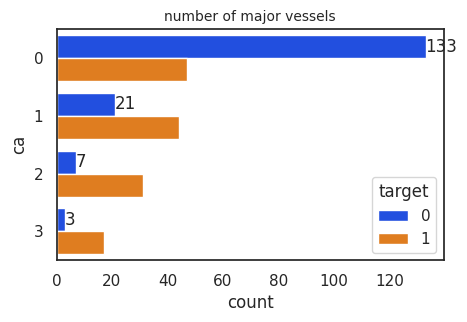

In [17]:
fig1 , ax1 = plt.subplots(figsize= (5,3))
ax1 = sns.countplot(data = df,y = "ca", hue = "target")
ax1.bar_label(container = ax1.containers[0])
ax1.set_title('number of major vessels',fontsize = 10 )


People with 0 major vessels, that is with ca = 0 have high chance of heart attack.

Text(0.5, 1.0, 'thalassemia')

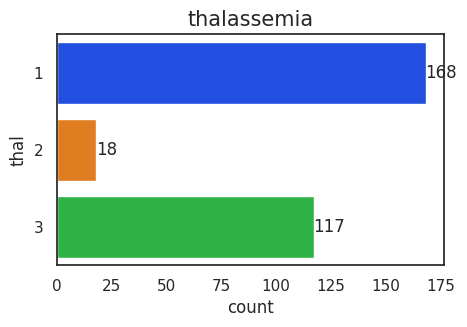

In [18]:
fig1 , ax1 = plt.subplots(figsize= (5,3))
ax1 = sns.countplot(y = df.thal)
ax1.bar_label(container = ax1.containers[0])
ax1.set_title('thalassemia',fontsize = 15 )

* 0: NULL
* 1: normal blood flow
* 2: fixed defect (no blood flow in some part of the heart)
* 3: reversible defect (a blood flow is observed but it is not normal(nominal)

### Frequency Distribution & Boxplot for Numerical Variables

#### Age

<Axes: ylabel='Density'>

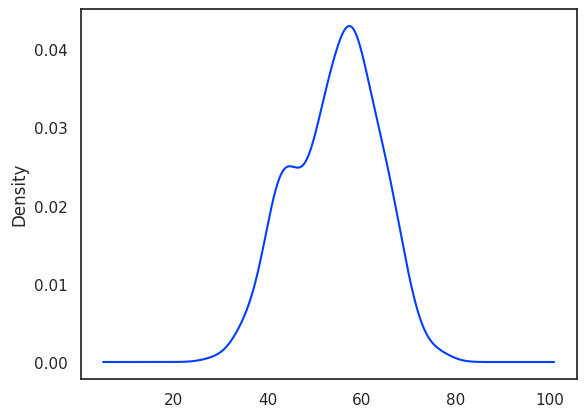

In [19]:
df['age'].plot(kind='kde')

Text(0.5, 1.0, 'Age')

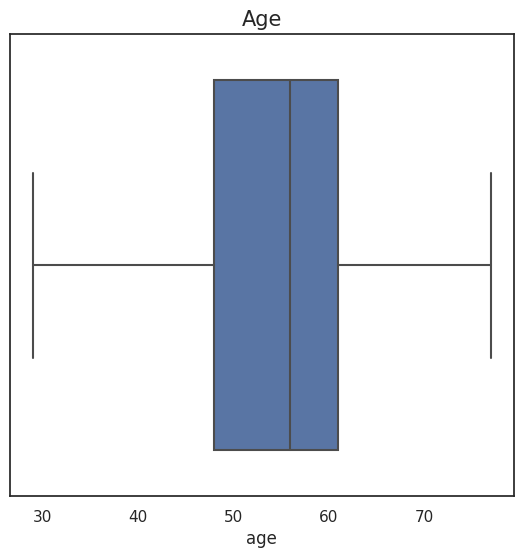

In [20]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.age, color = 'b')
ax1.set_title('Age',fontsize = 15 )

#### Blood preasure level
 

<Axes: ylabel='Density'>

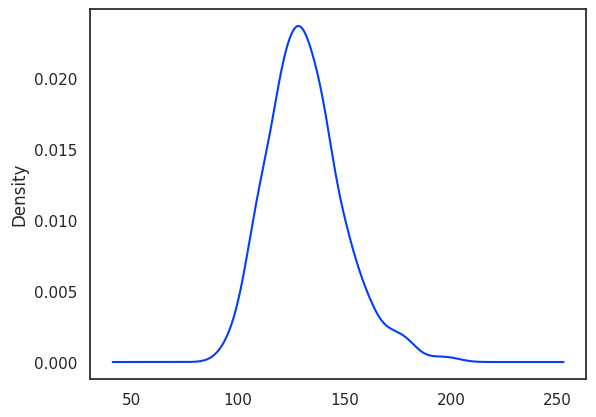

In [21]:
df['trestbps'].plot(kind='kde')

Text(0.5, 1.0, 'Blood preasure level')

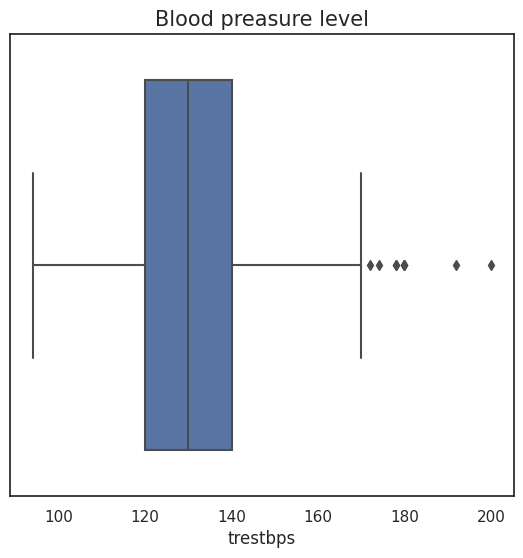

In [22]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.trestbps, color = 'b')
ax1.set_title('Blood preasure level',fontsize = 15 )

A doctor will diagnose hypertension right away if your blood pressure is extremely high (higher than 200/120 mmHg). If your blood pressure is higher than 180/110 mmHg, then your doctor will be able to diagnose you with hypertension after just two visits over a short period of time.

After research it was found that there are true cases where a patient can have Blood pressure level > 200 and are imediately diagnosed by the Doctor.

So I will not be removing these outliers for better prediction and rather use ML modles which are robust to outliers

#### Cholestrol

<Axes: ylabel='Density'>

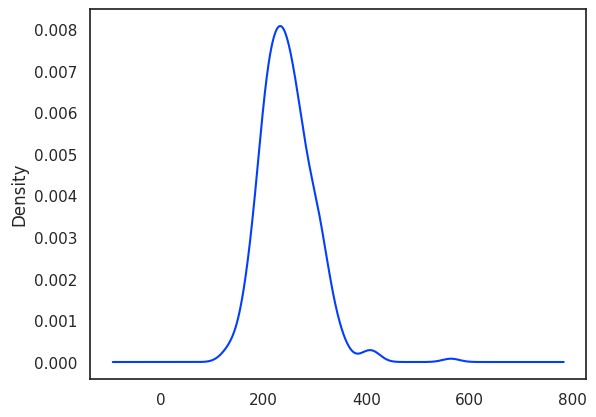

In [23]:
df['chol'].plot(kind='kde')

Text(0.5, 1.0, 'Cholestrol')

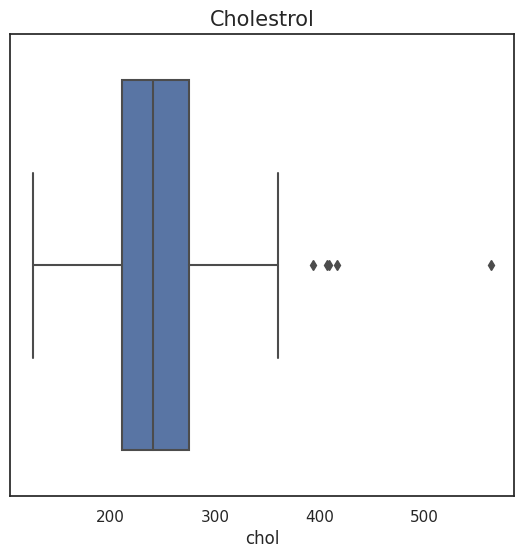

In [24]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.chol, color = 'b')
ax1.set_title('Cholestrol',fontsize = 15 )

Normal: less than 150 mg/dL. Mild hypertriglyceridemia: 150 to 499 mg/dL. Moderate hypertriglyceridemia: 500 to 886 mg/dL. Very high or severe hypertriglyceridemia: greater than 886 mg/dL.

#### Max heart rate

<Axes: ylabel='Density'>

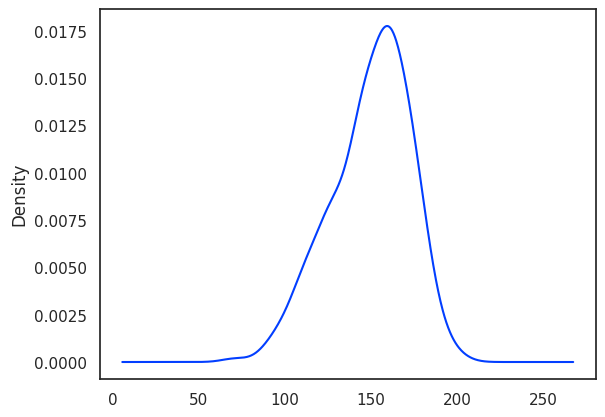

In [25]:
df['thalach'].plot(kind='kde')

Text(0.5, 1.0, 'Max heart rate')

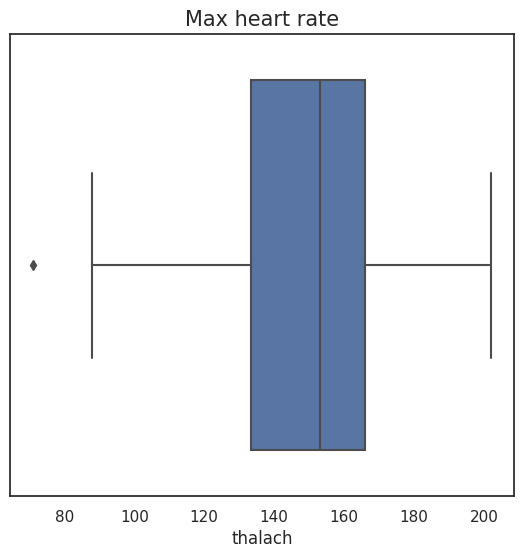

In [26]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.thalach, color = 'b')
ax1.set_title('Max heart rate',fontsize = 15 )

A normal resting heart rate should be between 60 to 100 beats per minute, but it can vary from minute to minute. If you're 40 years old: Your maximum heart rate is 180 bpm.

#### ST depression

<Axes: ylabel='Density'>

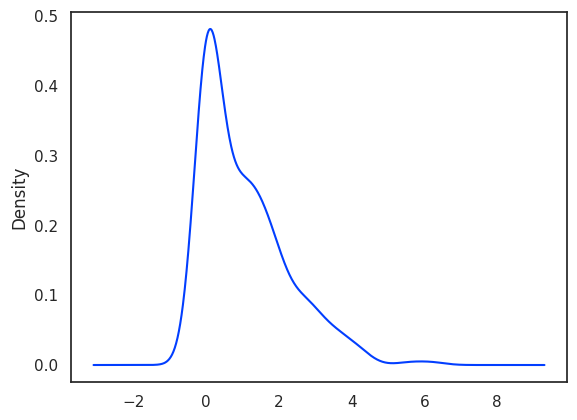

In [27]:
df['oldpeak'].plot(kind='kde')

Text(0.5, 1.0, 'ST-depression')

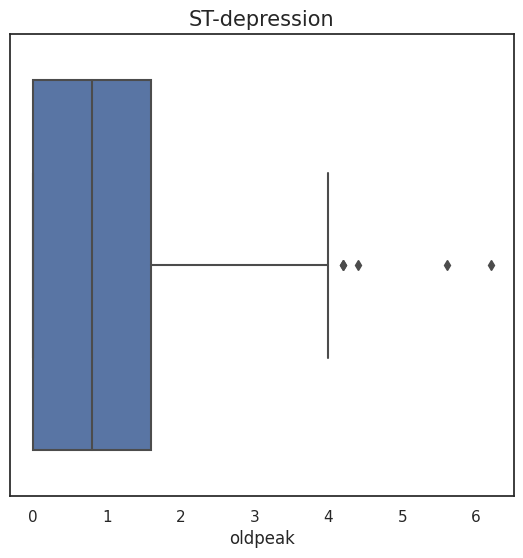

In [28]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.boxplot(x = df.oldpeak, color = 'b')
ax1.set_title('ST-depression',fontsize = 15 )

For males 40 years old and older, this value is 0.2 mV. For adult females, the value is 0.15 mV. The upper limit of normal J-point elevation in all the other standard leads for males and females is 0.1 mV. ST depression occurs when the J point is displaced below baseline.

Since this is a medical issue, additional domain expertise is required for improved prediction, and I have also discovered actual instances of the outlier values.
I will therefore keep the outliers and train the models using them in order to improve the model's prediction.

## Bivariate

### Age and Target

<Axes: xlabel='age', ylabel='Density'>

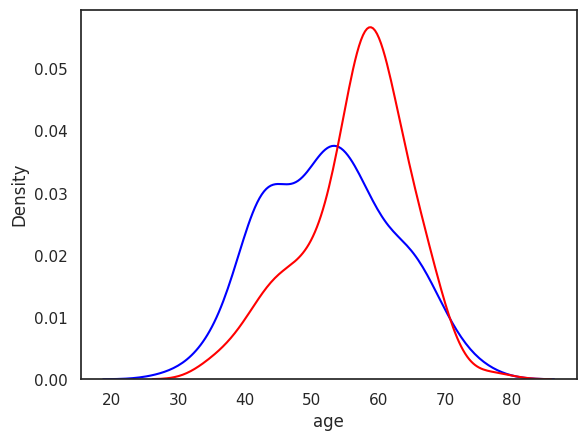

In [29]:
sns.distplot(df[df['target']==0]['age'], hist=False, color='blue')
sns.distplot(df[df['target']==1]['age'], hist=False, color='red') 

Probability of having Heart disease is more in the age group of 50 to 70, and probability of having Heart disease is less in the age group of 20 to 50

### Choloestrol and Target

<Axes: xlabel='chol', ylabel='Density'>

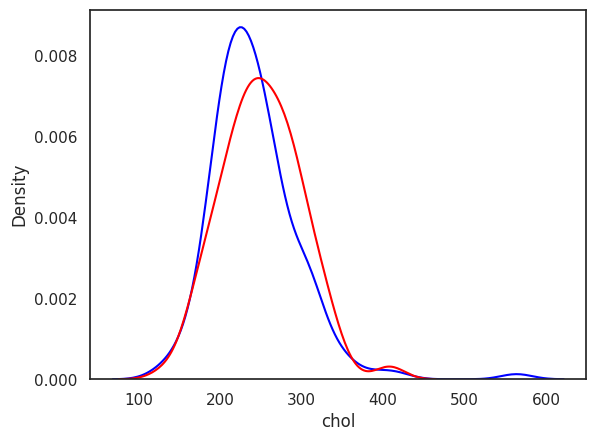

In [30]:
sns.distplot(df[df['target']==0]['chol'], hist=False, color='blue')
sns.distplot(df[df['target']==1]['chol'], hist=False, color='red') 

Almost same. Nothing much could be found

### Max hearth rate and Target

<Axes: xlabel='thalach', ylabel='Density'>

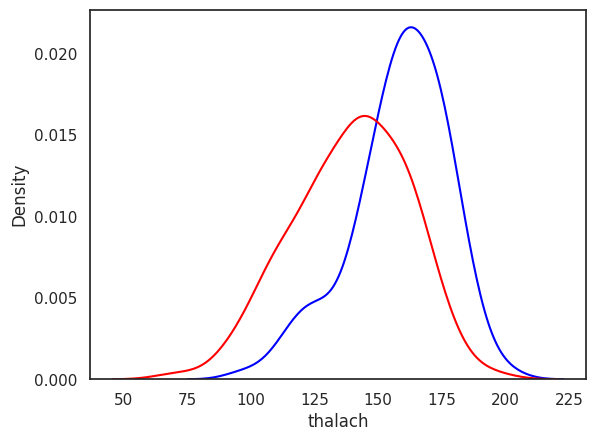

In [31]:
sns.distplot(df[df['target']==0]['thalach'], hist=False, color='blue')
sns.distplot(df[df['target']==1]['thalach'], hist=False, color='red') 

heart rate with 150 to 170 are less prone to heart disease

### Gender and Target

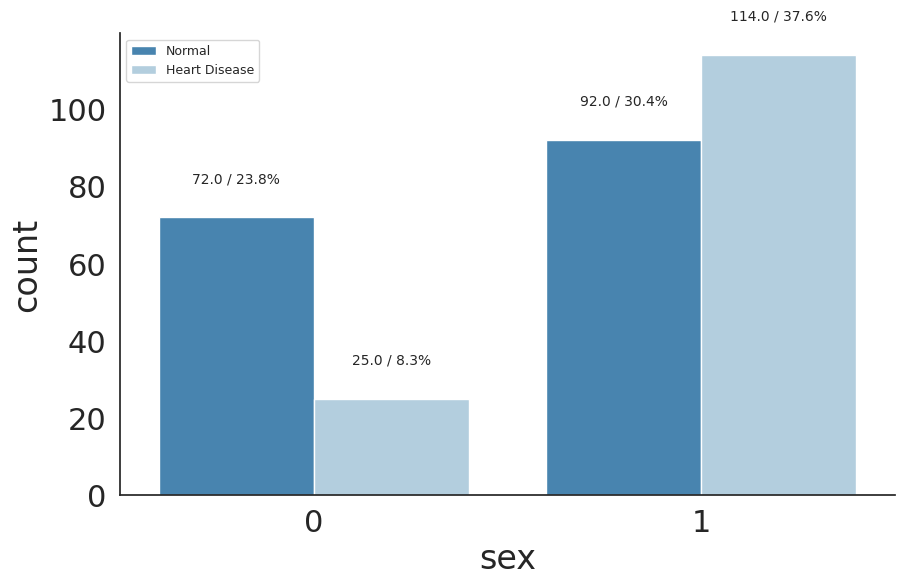

In [32]:
total_cnt = df['target'].count()
plt.figure(figsize=(10,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=df, x='sex',hue='target',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=10)
plt.legend(labels=labels, fontsize=9)
sns.despine()

In Females, maximum of them are normal. But in Male, maximum are suffering heart disease.

### chest pain vs heart disease

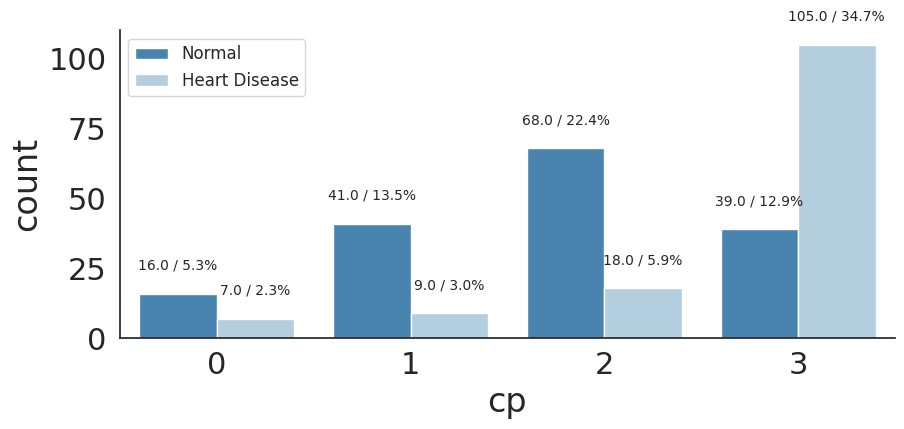

In [33]:
total_cnt = df['target'].count()
plt.figure(figsize=(10,4))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=df, x='cp',hue='target',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=10)
plt.legend(labels=labels, fontsize=12)
sns.despine()

asymptomatic had the highest patients of heart disease

### resting ecg vs heart diseases

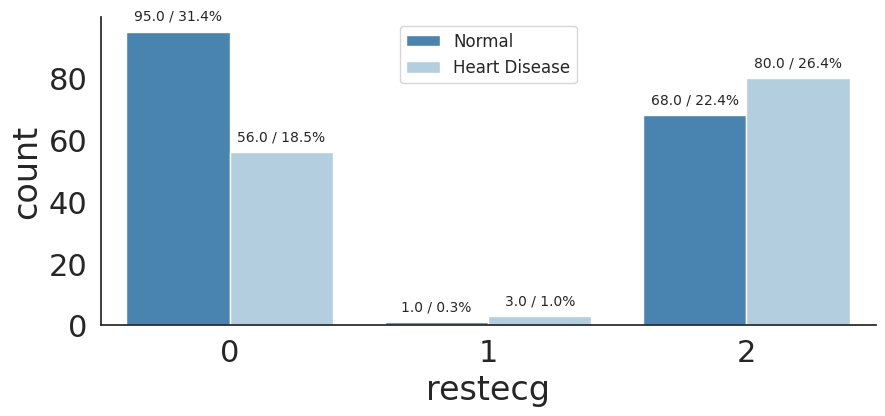

In [34]:
total_cnt = df['target'].count()
plt.figure(figsize=(10,4))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=df, x='restecg',hue='target',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 5, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=10)
plt.legend(labels=labels, fontsize=12)
sns.despine()

### slope vs heart disease

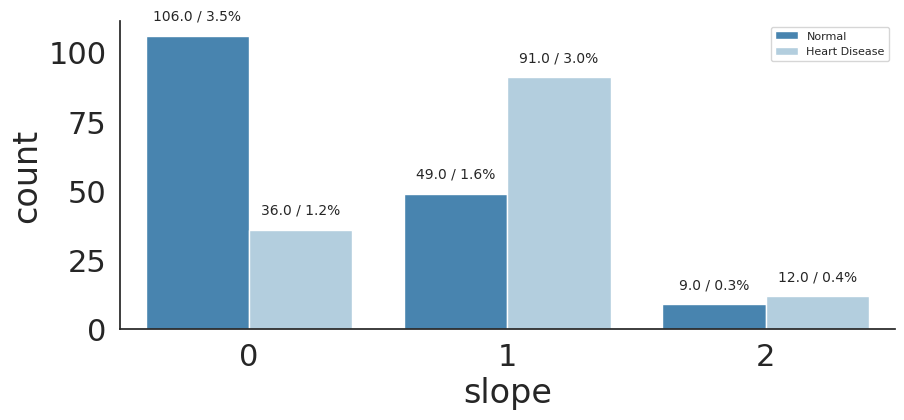

In [35]:
total_cnt = df['target'].count()
plt.figure(figsize=(10,4))
sns.set(font_scale = 2)
plt.subplots_adjust(wspace=0.1)
sns.set_style("white")
ax = sns.countplot(data=df, x='slope',hue='target',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 7, f'{height} / {height / total_cnt * 10:2.1f}%', va='center', ha='center', size=10)
plt.legend(labels=labels, fontsize=8)
sns.despine()

patient with flat st segment are more prone

### PairPlot

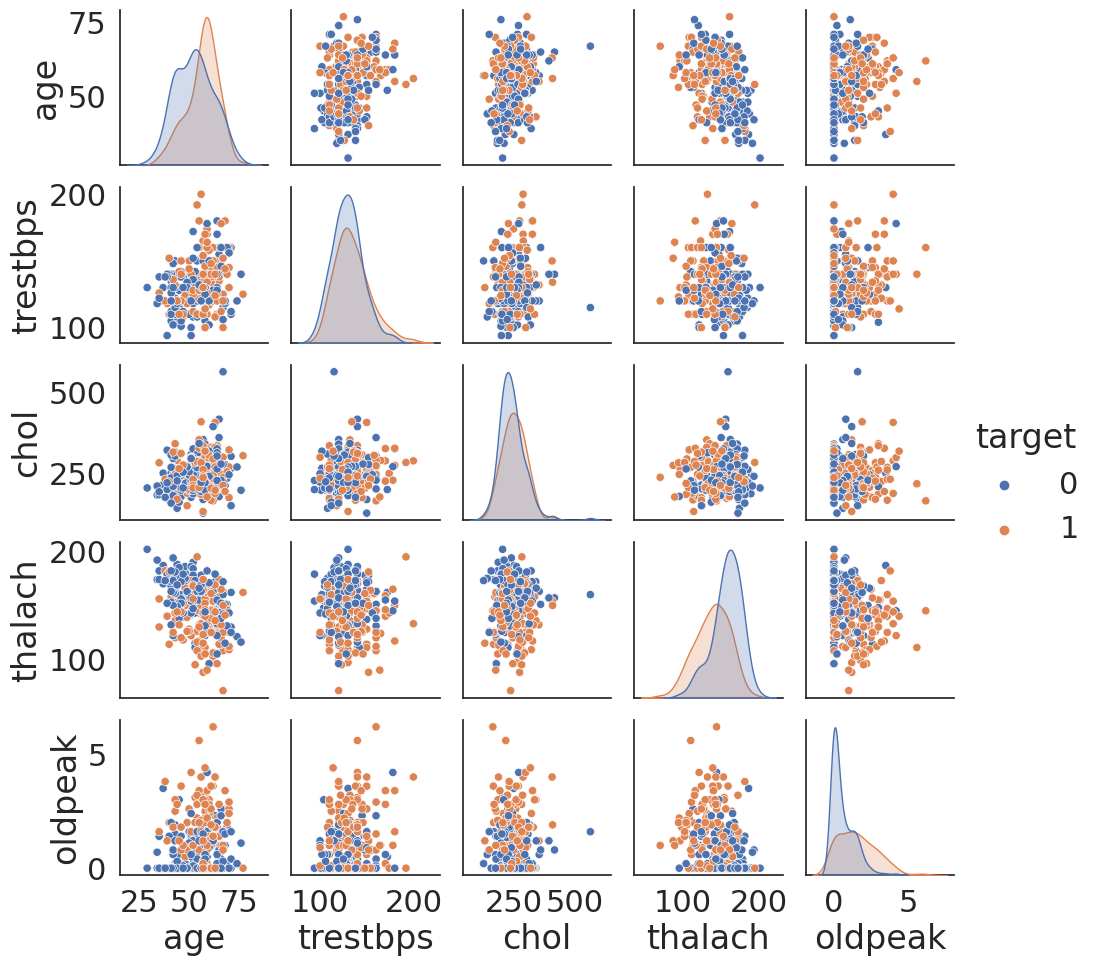

In [36]:
con_cols = ["age","trestbps","chol","thalach","oldpeak", "target"]
temp_df = df[con_cols]
sns.pairplot(data = temp_df, hue="target", size =2)


## Multivariate 

### Age, gender and Patient status

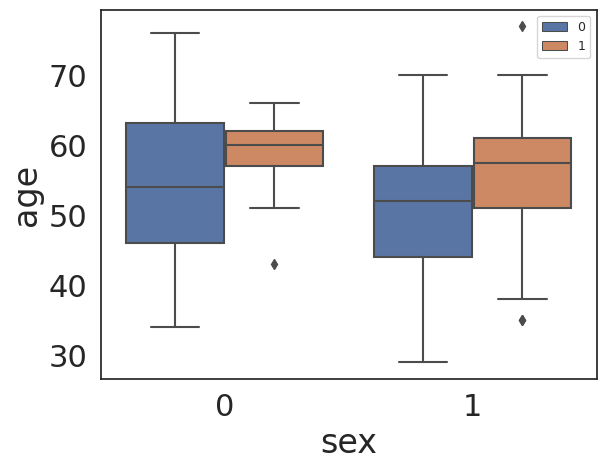

In [37]:
sns.boxplot(x='sex', y='age',hue='target', data=df)
plt.legend(fontsize=9)

Younger people, of either gender, do not suffer heart disease. We can also see that the majority of heart disease patients in women are between the ages of 55 and 64, and in men between the ages of 50 and 65.

### Blood preassure level

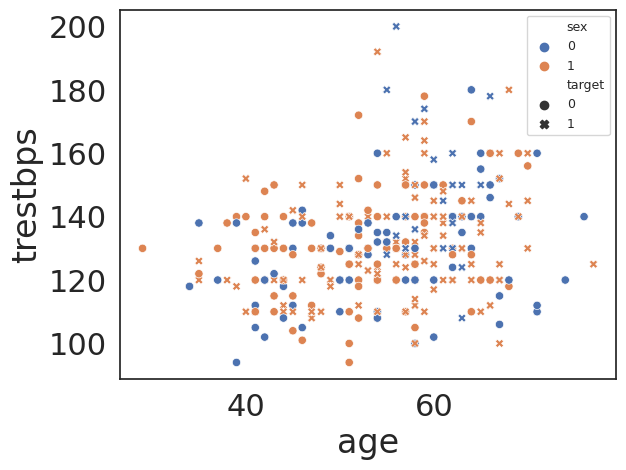

In [38]:
sns.scatterplot(x='age',y='trestbps',hue='sex',style='target',data=df)
plt.legend(fontsize=9)

could not found any particular pattern

### Cholestrol

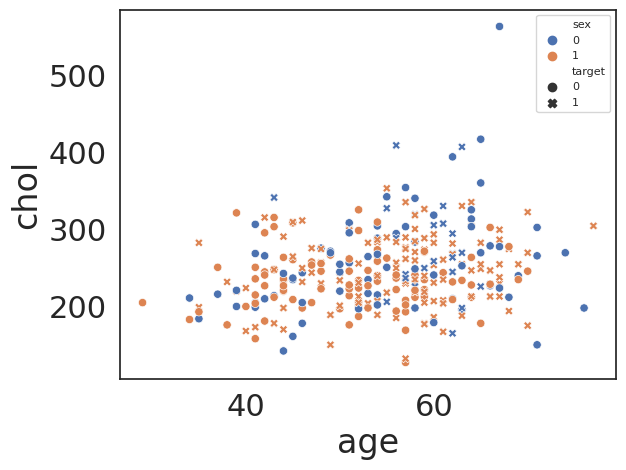

In [39]:
sns.scatterplot(x='age',y='chol',hue='sex',style='target',data=df)
plt.legend( fontsize=8)

Could not find any particular pattern

### Max Heart Rate Received

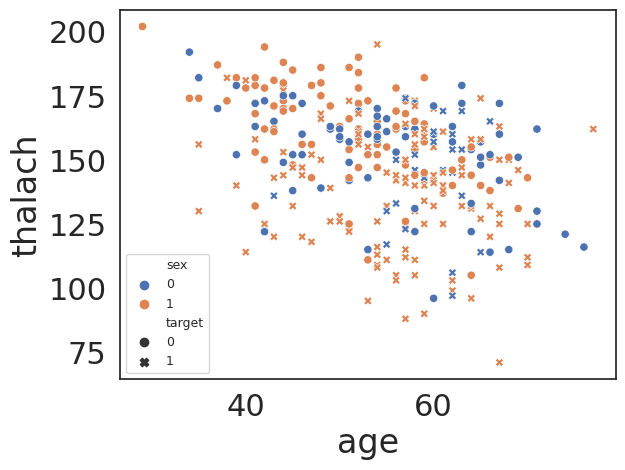

In [40]:
sns.scatterplot(x='age',y='thalach',hue='sex',style='target',data=df)
plt.legend( fontsize=9)

Seems to have a slight negative slope but cannot confirm it

### ST-depression

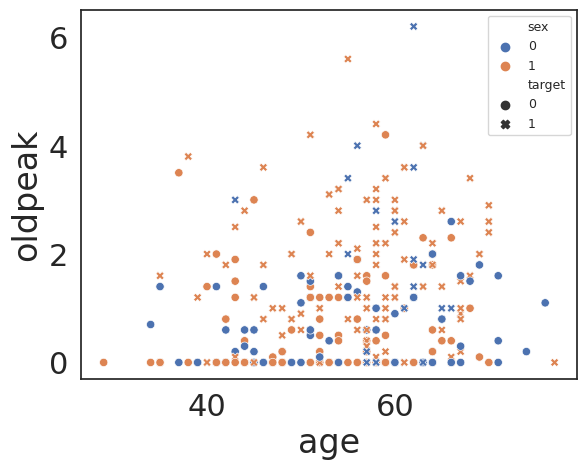

In [41]:
sns.scatterplot(x='age',y='oldpeak',hue='sex',style='target',data=df)
plt.legend(fontsize=9)

no patterns found

# Making a Balanced Dataset

In [42]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# counter = Counter(df['target'])
# print('Before',counter)
# # oversampling the train dataset using SMOTE
# smt = SMOTE()
# #X_train, y_train = smt.fit_resample(X_train, y_train)
# X_res, y_res = smt.fit_resample(df.iloc[:,:-1].values, df.iloc[:,-1].values)

# counter = Counter(y_res)
# print('After',counter)

Going to work with the original dataset

# Encoding

In [43]:
from sklearn.preprocessing import RobustScaler

In [44]:
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]

In [45]:
# encoding the categorical columns
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)

Text(0.5, 1.0, 'Correlation Plot')

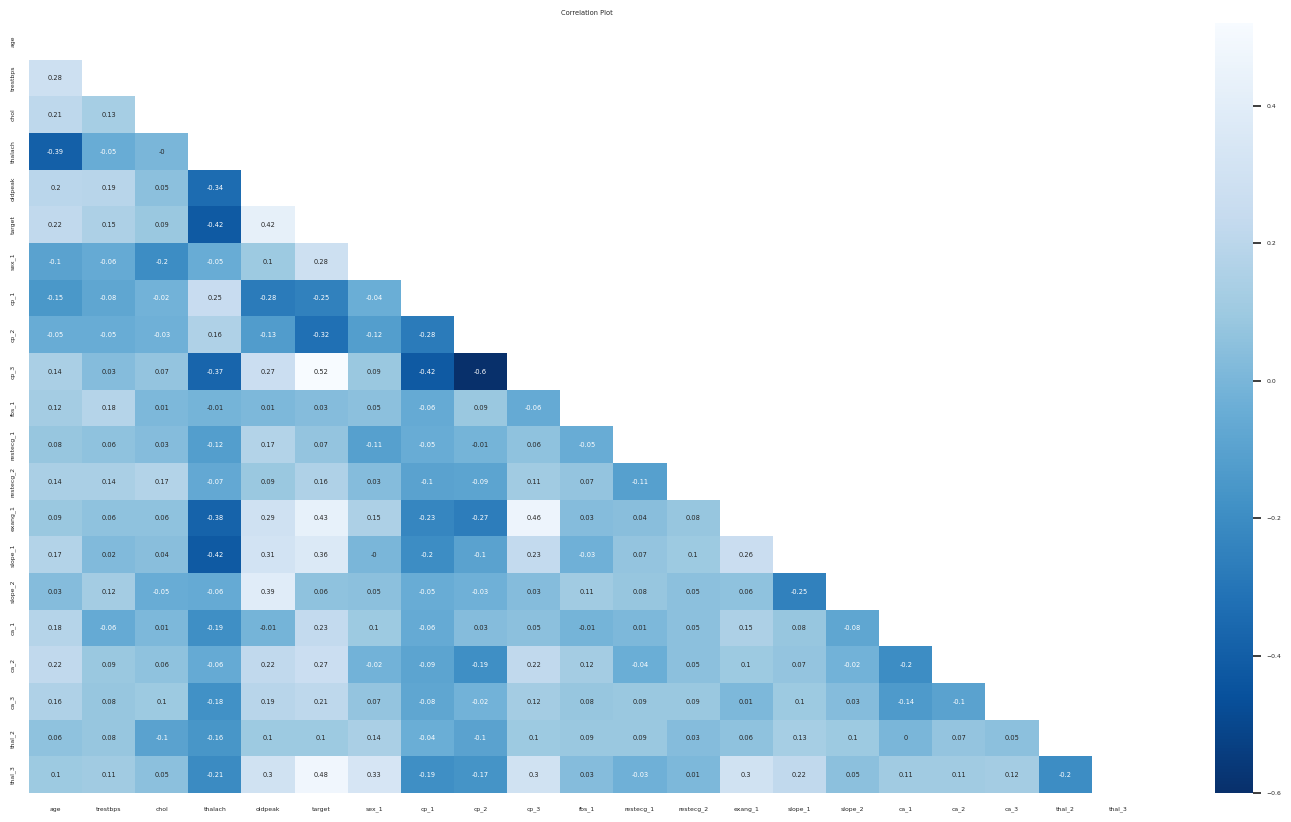

In [46]:
# plt.figure(figsize=(20,20))
# sns.heatmap(df.corr(), annot=True, fmt=".2")

corr=df.corr().round(2)

sns.set(font_scale=.4)
plt.figure(figsize=(18, 10))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='Blues_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

correlation with target variable

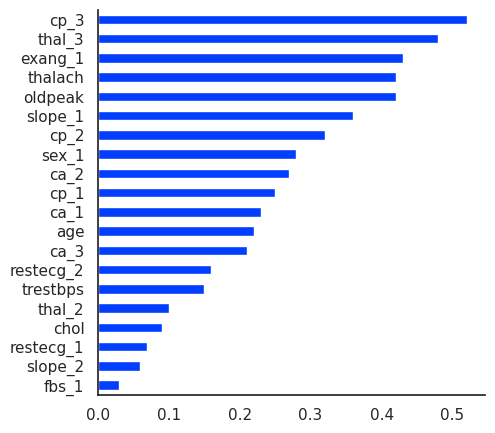

In [47]:
sns.set(font_scale=1)
plt.figure(figsize=(5, 5))
sns.set_style("white")
sns.set_palette("bright")
abs(corr['target']).sort_values()[:-1].plot.barh()
plt.gca().set_facecolor('#FFFFFF')
sns.despine()

# Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# defining the features and target
X = df.drop(['target'],axis=1)
y = df[['target']]

In [50]:
# df.head()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [52]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (242, 20)
y_train shape: (242, 1)
X_test shape: (61, 20)
y_test shape: (61, 1)


# ML classification models with real dataset

## Random forest classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [54]:
rf = RandomForestClassifier()

In [55]:
rf.fit(X, y)
# Get the feature importances
importances = rf.feature_importances_
# Create a list of (feature, importance) tuples and sort them by importance
feature_importances = list(zip(X.columns, importances))
feature_importances.sort(key=lambda x: x[1], reverse=True)
# Print the top 10 features
for feature, importance in feature_importances[:10]:
    print(f"{feature}: {importance}")

thalach: 0.12543224495387156
oldpeak: 0.1158103526334105
cp_3: 0.10536920805517883
age: 0.0923187655065492
chol: 0.08680089980057729
thal_3: 0.08660034586802683
trestbps: 0.08057053131551108
exang_1: 0.06627233570687988
sex_1: 0.04075440410537343
slope_1: 0.03931757826660939


In [56]:
params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [5, 8, 10]
}

In [57]:
grid_search = GridSearchCV(rf, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_split': [5, 8, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [58]:
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.8136054421768708


In [59]:
y_pred = grid_search.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [61]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

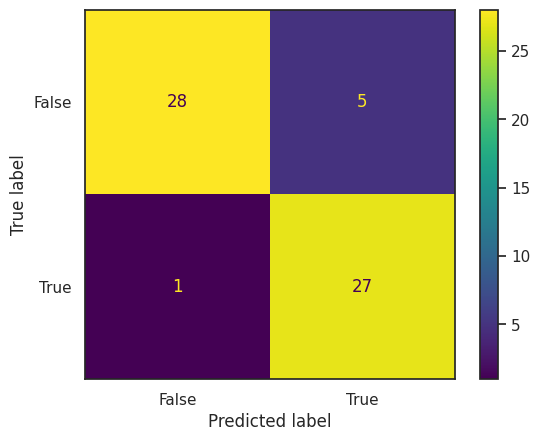

In [62]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [63]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('ROC AUC score:', roc_auc)

Accuracy: 0.9016393442622951
Precision: 0.84375
Recall: 0.9642857142857143
F1 score: 0.8999999999999999
ROC AUC score: 0.9063852813852814


## XGBClassifier

In [64]:
from xgboost import XGBClassifier

In [65]:
params = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'gamma': [0, 0.1, 0.2]
}

In [66]:
xgb = XGBClassifier()

In [67]:
grid_search = GridSearchCV(xgb, param_grid=params, cv=5, n_jobs=-1)

In [68]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]})

In [69]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best score: 0.8136904761904763


In [70]:
y_pred = grid_search.predict(X_test)

In [71]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

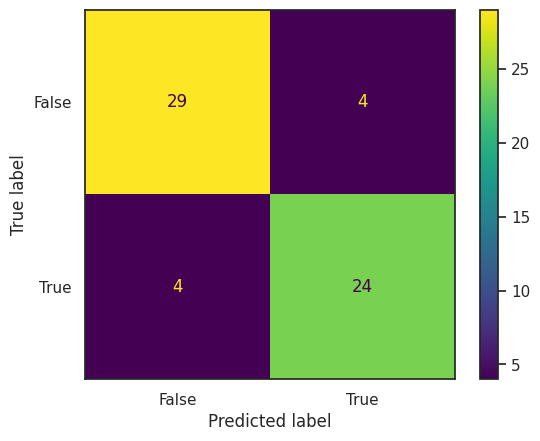

In [72]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [73]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('ROC AUC score:', roc_auc)

Accuracy: 0.8688524590163934
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1 score: 0.8571428571428571
ROC AUC score: 0.867965367965368


## KNeighborsClassifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler

In [75]:
scaler = RobustScaler()
scaler.fit(X_train[['age','trestbps','chol','thalach','oldpeak']])


RobustScaler()

In [76]:
X_train[['age','trestbps','chol','thalach','oldpeak']] = scaler.transform(X_train[['age','trestbps','chol','thalach','oldpeak']])
X_test[['age','trestbps','chol','thalach','oldpeak']] = scaler.transform(X_test[['age','trestbps','chol','thalach','oldpeak']])

In [77]:
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [78]:
pd.DataFrame(X_train).head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3
180,-0.615385,-0.3,0.448669,0.396825,-0.1875,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
208,-0.076923,0.0,0.266160,0.047619,-0.5000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
167,-0.153846,0.1,0.661597,0.174603,-0.5000,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0
105,-0.153846,-1.1,0.980989,0.079365,-0.5000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
297,0.076923,0.5,-0.053232,-0.968254,-0.3750,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1


In [79]:
knn = KNeighborsClassifier()

In [80]:
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

In [81]:
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [82]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation score: 0.81


In [83]:
y_pred = grid_search.predict(X_test)
grid_search.score(X_test, y_test)

0.8852459016393442

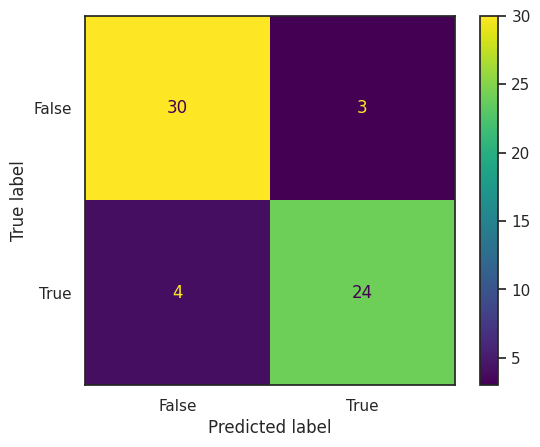

In [84]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [85]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [86]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('ROC AUC score:', roc_auc)

Accuracy: 0.8852459016393442
Precision: 0.8888888888888888
Recall: 0.8571428571428571
F1 score: 0.8727272727272727
ROC AUC score: 0.8831168831168831


## AdaBoostClassifier

In [87]:
from sklearn.ensemble import AdaBoostClassifier

In [88]:
ada = AdaBoostClassifier()

In [89]:
param_grid = {'n_estimators': [50, 100, 150, 200],
              'learning_rate': [0.01, 0.1, 1, 10],
              'algorithm': ['SAMME', 'SAMME.R']}

In [90]:
grid_search = GridSearchCV(ada, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [91]:
best_ada = grid_search.best_estimator_
y_pred = best_ada.predict(X_test)

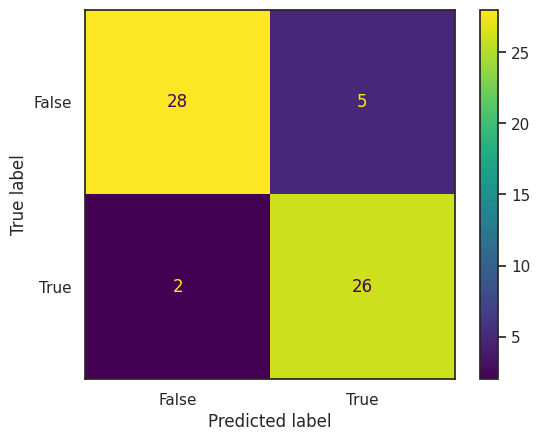

In [92]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [93]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [94]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('ROC AUC score:', roc_auc)

Accuracy: 0.8852459016393442
Precision: 0.8387096774193549
Recall: 0.9285714285714286
F1 score: 0.8813559322033899
ROC AUC score: 0.8885281385281386


## Hyperparameter Tunning

In [95]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
import optuna
from sklearn.metrics import accuracy_score, classification_report

### Model used is XGBoost

In [97]:
model = XGBClassifier(use_label_encoder=False, 
                      eval_metric='mlogloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [98]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 50),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False,
        'max_leaves': trial.suggest_int('max_leaves', 5, 50)
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [99]:
study = optuna.create_study(direction='maximize')

[I 2023-04-26 14:02:13,177] A new study created in memory with name: no-name-3ef5d89d-8ab4-4ab3-b3ec-e499cfae40a9


In [100]:
study.optimize(objective, n_trials=100)

[I 2023-04-26 14:02:13,225] Trial 0 finished with value: 0.5409836065573771 and parameters: {'max_depth': 11, 'learning_rate': 0.057523349652870114, 'n_estimators': 54, 'min_child_weight': 9, 'gamma': 0.04554137139234498, 'subsample': 0.14951212303430123, 'colsample_bytree': 0.023203366046800282, 'reg_alpha': 3.783429416963538e-07, 'reg_lambda': 3.1753094960977665e-05, 'max_leaves': 22}. Best is trial 0 with value: 0.5409836065573771.
[I 2023-04-26 14:02:13,279] Trial 1 finished with value: 0.45901639344262296 and parameters: {'max_depth': 47, 'learning_rate': 0.23967784786113622, 'n_estimators': 134, 'min_child_weight': 3, 'gamma': 4.3303487379627674e-08, 'subsample': 0.0215794339935273, 'colsample_bytree': 0.17226514704897272, 'reg_alpha': 1.3466504216113518e-08, 'reg_lambda': 0.007247180741573988, 'max_leaves': 31}. Best is trial 0 with value: 0.5409836065573771.
[I 2023-04-26 14:02:13,388] Trial 2 finished with value: 0.5409836065573771 and parameters: {'max_depth': 34, 'learning_r

In [101]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.9180327868852459
  Params: 
    max_depth: 21
    learning_rate: 0.05700573797687002
    n_estimators: 471
    min_child_weight: 1
    gamma: 0.06586145918469187
    subsample: 0.4782235422407448
    colsample_bytree: 0.010089589479264326
    reg_alpha: 0.0035774993152372487
    reg_lambda: 0.1182720791940688
    max_leaves: 37


In [102]:
params = trial.params
params

{'max_depth': 21,
 'learning_rate': 0.05700573797687002,
 'n_estimators': 471,
 'min_child_weight': 1,
 'gamma': 0.06586145918469187,
 'subsample': 0.4782235422407448,
 'colsample_bytree': 0.010089589479264326,
 'reg_alpha': 0.0035774993152372487,
 'reg_lambda': 0.1182720791940688,
 'max_leaves': 37}

In [103]:
model = XGBClassifier(**params)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.010089589479264326, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.06586145918469187, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05700573797687002, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=21, max_leaves=37,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=471, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [104]:
y_pred = model.predict(X_test)

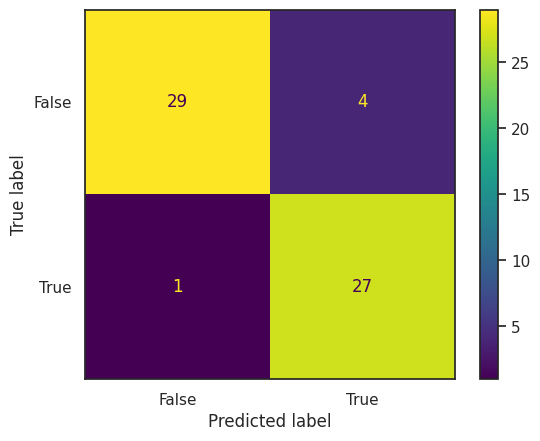

In [105]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [106]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [107]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('ROC AUC score:', roc_auc)

Accuracy: 0.9180327868852459
Precision: 0.8709677419354839
Recall: 0.9642857142857143
F1 score: 0.9152542372881356
ROC AUC score: 0.9215367965367965


# Conclusion

As our business problem is a medical project, reducing the False Negative (i.e., the model forecasted the patient as normal but the patient actually had heart disease) should be our primary goal. Recall and F1 score should therefore be given priority as our major measures. We received the highest Recall and F1 score with Random Forest Classifier, followed by Ada Boost Classifier, from that data.
But I choosed XGBoost classifier and did some more Hyperparameter tunning with optuna module and received the highest Recall and F1 score.

Few observations - 

*   Dataset more numbers of males than females
*   Maximum number of patients were asymptomatic  
*   Maximum population belonged to the age group of 40 to 65 years
*   I  also discovered actual instances of the outlier values. Therefore I decided to keep the outliers.
*   Probability of having Heart disease is more in the age group of 50 to 70, and probability of having Heart disease is less in the age group of 20 to 50
*   Heart rate with 150 to 170 are less prone to heart disease
*   In Females, maximum of them are normal. But in Male, maximum are suffering heart disease.
*   Asymptomatic people had the highest of heart disease
*   Younger people, of either gender, do not suffer heart disease. We can also see that the majority of heart disease patients in women are between the ages of 55 and 64, and in men between the ages of 50 and 65.















